In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import corner

import sys 
sys.path.append("../lib")
from figparams import *
plt.rcParams.update(rc_params)

In [5]:
filename = "../data/dataFigure5.h5"
df = pd.read_hdf(filename, key='df')

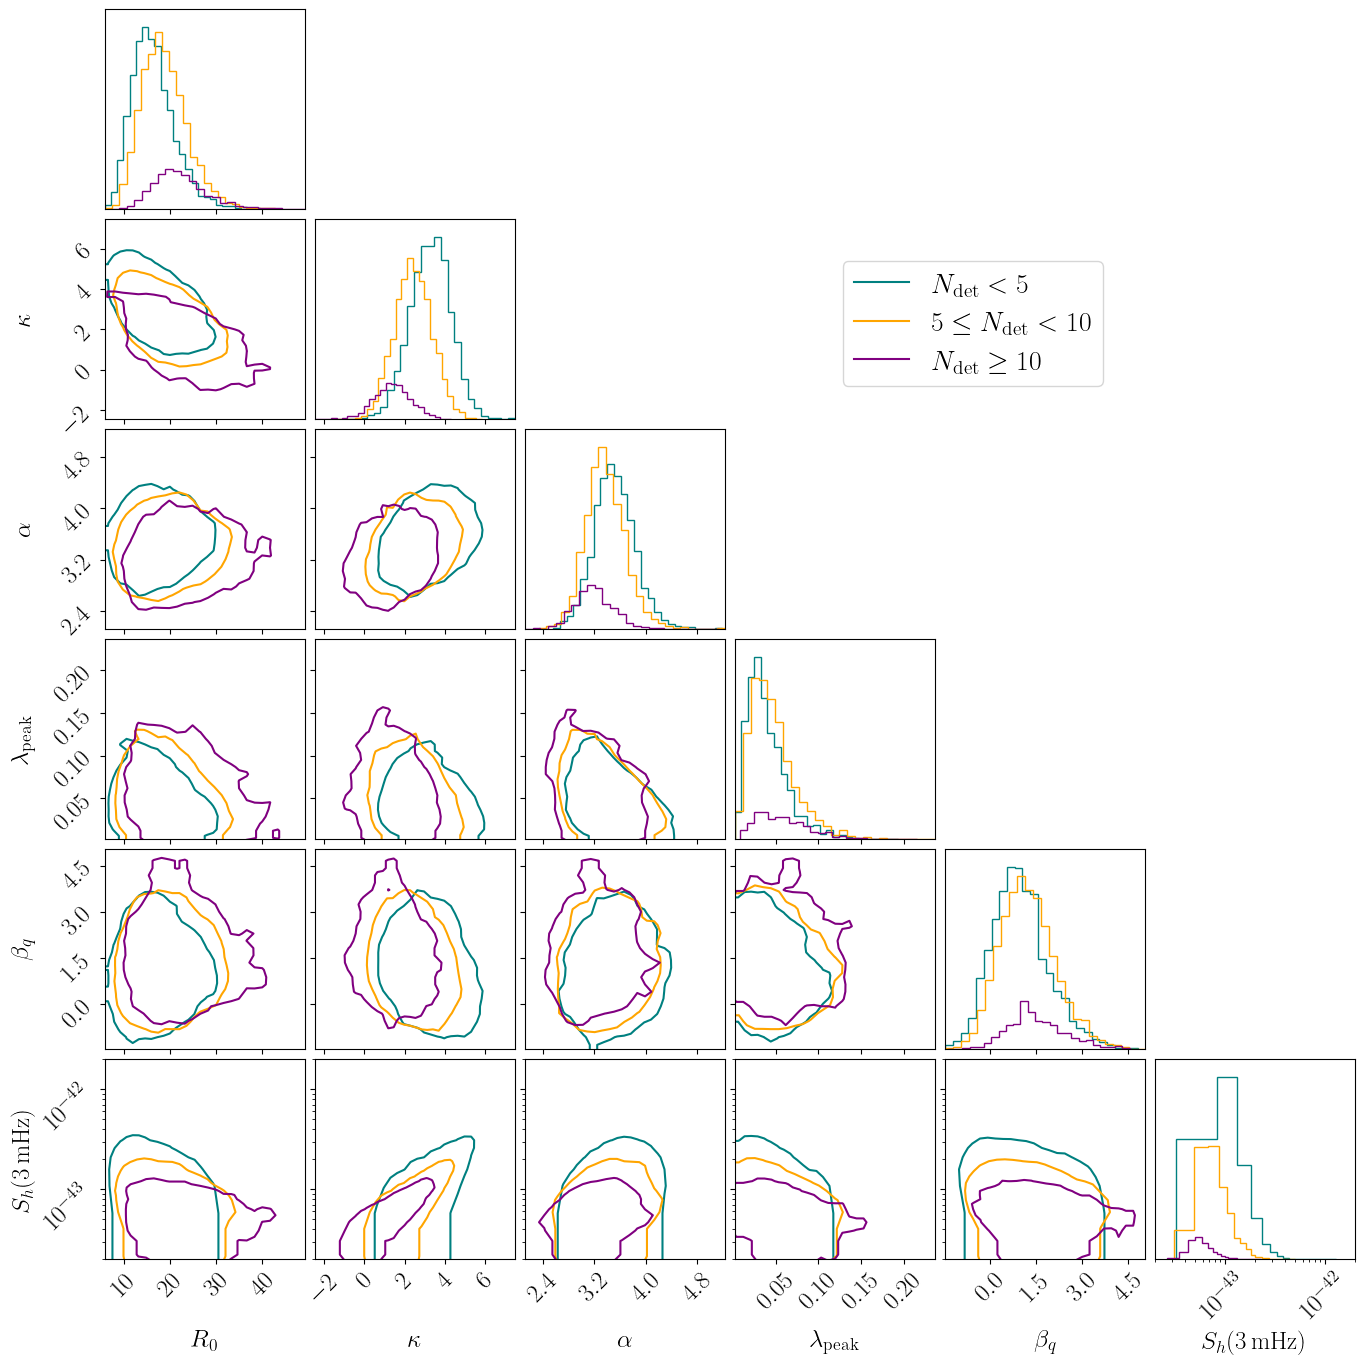

In [6]:
df05 = df[df['SNR>8'] < 5]
df510 = df[(df['SNR>8'] >= 5) & (df['SNR>8'] < 10)]
df1025 = df[df['SNR>8'] >= 10]
dcols = ['SNR>4', 'SNR>6', 'SNR>8', "m_min", 
         "m_max", "delta_m", "expected_a", 
         "zeta_spin", "var_a", "sigma_t", "mu_m", "sigma_m"]
smooth2d = 0.8
levels = [0.95]
colors=['teal', 'orange', 'purple']
al=0.3
bi=25
labels = ["$R_0$", "$\kappa$", "$\\alpha$", "$\lambda_{\\rm peak}$", "$\\beta_q$", "$S_h(3\,\\rm mHz)$"]
fig = corner.corner(df05.drop(columns=dcols), bins=bi, color=colors[0], smooth=smooth2d, labels=labels, levels=levels, fill_contours=False,
                    show_titles=False, plot_density=False, plot_datapoints=False, )
corner.corner(df510.drop(columns=dcols), bins=bi, color=colors[1], smooth=smooth2d, labels=labels, levels=levels, fill_contours=False, 
              show_titles=False, plot_density=False, plot_datapoints=False, fig=fig,)
corner.corner(df1025.drop(columns=dcols),bins=bi, color=colors[2], smooth=smooth2d, labels=labels, levels=levels, fill_contours=False, 
              show_titles=False, plot_density=False, plot_datapoints=False, fig=fig, )

axes = np.array(fig.axes).reshape((6,6))
axes[5,0].set_ylim(2e-44, 2e-42)
axes[5,0].set_yscale("log")
for i in range(1,5):
    axes[5,i].set_ylim(2e-44, 2e-42)
    axes[5,i].set_yscale("log")
    axes[5,i].set_yticklabels([])
    
axes[5,5].set_xlim(2e-44, 2e-42)
axes[5,5].set_xscale("log")

leglabels = ["$N_{\\rm det} < 5$","$5 \leq N_{\\rm det}<10$","$N_{\\rm det} \geq 10$"]

fig.legend(
    handles=[mlines.Line2D([], [], color=colors[i], label=leglabels[i]) for i in range(3)],
    fontsize=20, frameon=True, bbox_to_anchor=(0.8, 0.8), loc="upper right"
    )

for i in range(6):
    axes[i,0].yaxis.set_label_coords(-0.35, 0.5)
    axes[5,i].xaxis.set_label_coords(0.5, -0.35)
    
fig.savefig("../plots/Figure5.pdf", bbox_inches="tight")